In [2]:
import numpy as np
import scipy.sparse as sp
np.random.seed()

L = 30

states = np.random.choice([-1,1],size=(10000,L))
print (states.shape)

(10000, 30)


In [3]:
def ising_energies(states):
    L = states.shape[1]
    J = np.zeros((L,L),)
    for i in range(L):
        J[i,(i+1)%L] = -1.0
    E = np.einsum('...i,ij,...j->...',states,J,states)
    return E

energies = ising_energies(states)


In [9]:
states = np.einsum('...i,...j->...ij',states,states)
shape = states.shape
print (shape)
states = states.reshape((shape[0],shape[1]*shape[2]))
Data = [states,energies]


(10000, 900, 900)


In [5]:
n_samples = 8000
X_train = Data[0][:n_samples]
y_train = Data[1][:n_samples]
X_test  = Data[0][n_samples:]
y_test  = Data[1][n_samples:]


In [6]:
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn

ols   = linear_model.LinearRegression()
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()

train_errors_ols   = []
test_errors_ols    = []

train_errors_ridge = []
test_errors_ridge  = []

train_errors_lasso = []
test_errors_lasso  = []

alphas = np.logspace(-5,5,10)
print (alphas)

coefs_ols   = []
coefs_ridge = []
coefs_lasso = []

[1.00000000e-05 1.29154967e-04 1.66810054e-03 2.15443469e-02
 2.78255940e-01 3.59381366e+00 4.64158883e+01 5.99484250e+02
 7.74263683e+03 1.00000000e+05]


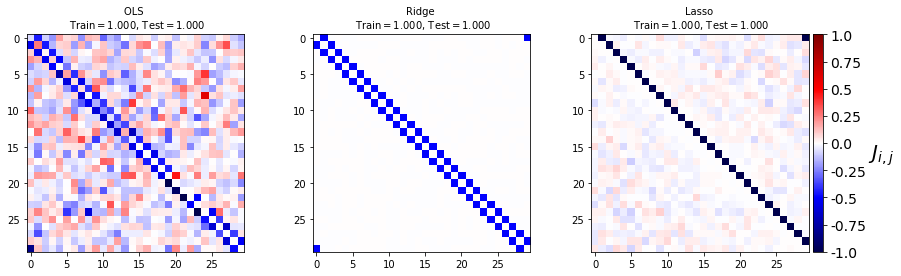

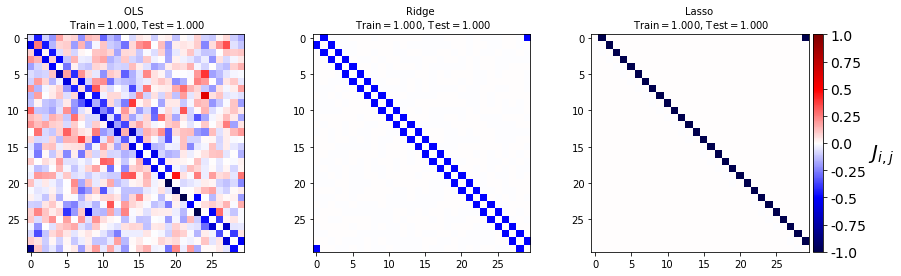

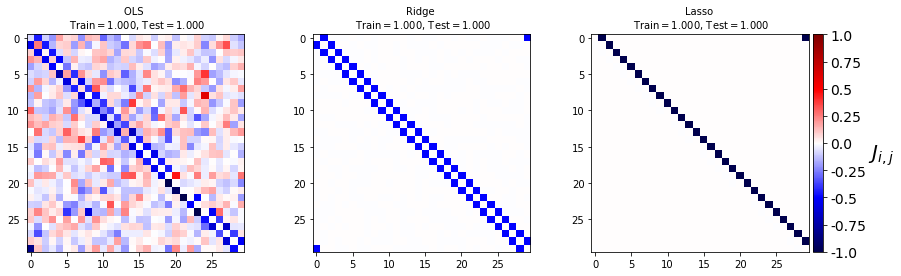

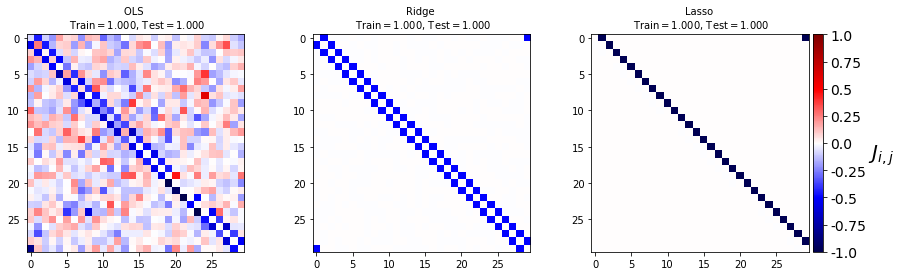

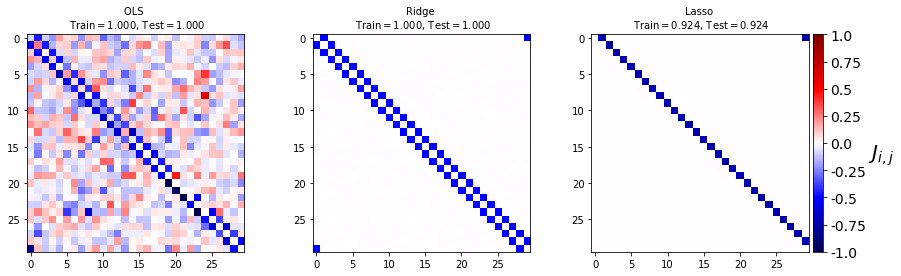

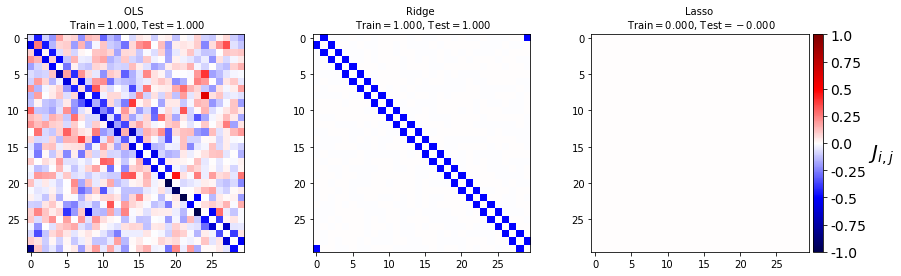

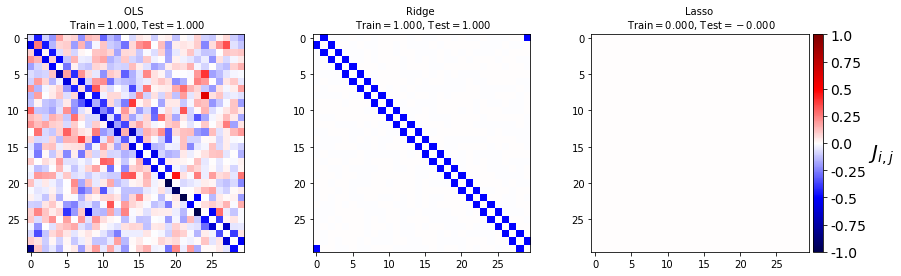

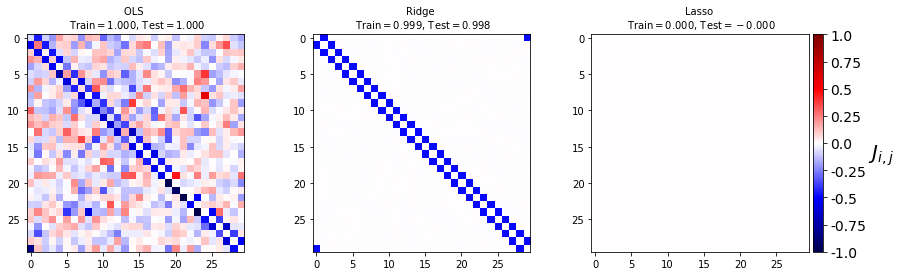

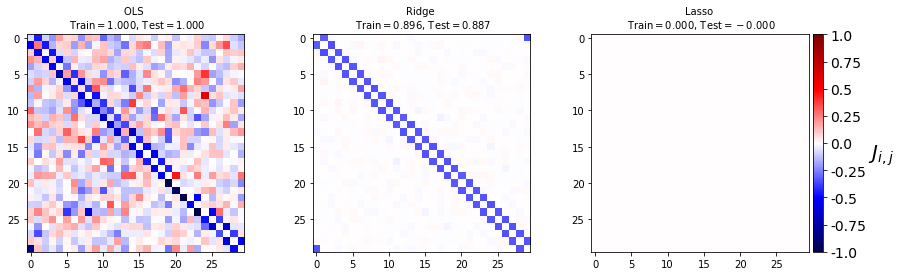

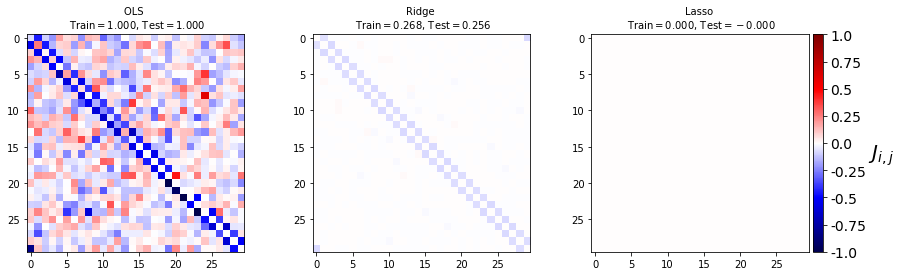

In [7]:
for a in alphas:
    ols.fit(X_train,y_train)
    coefs_ols.append(ols.coef_)
    train_errors_ols.append(ols.score(X_train,y_train))
    test_errors_ols.append(ols.score(X_test,y_test))
    
    ridge.set_params(alpha=a)
    ridge.fit(X_train,y_train)
    coefs_ridge.append(ridge.coef_)
    train_errors_ridge.append(ridge.score(X_train,y_train))
    test_errors_ridge.append(ridge.score(X_test,y_test))
    
    lasso.set_params(alpha=a)
    lasso.fit(X_train,y_train)
    coefs_lasso.append(lasso.coef_)
    train_errors_lasso.append(lasso.score(X_train,y_train))
    test_errors_lasso.append(lasso.score(X_test,y_test))
    
    J_ols   = np.array(ols.coef_).reshape((L,L))
    J_ridge = np.array(ridge.coef_).reshape((L,L))
    J_lasso = np.array(lasso.coef_).reshape((L,L))
    
    cmap_args = dict(vmin=-1.0, vmax=1.0, cmap='seismic')
    
    fig, axarr = plt.subplots(nrows=1,ncols=3)
    
    axarr[0].imshow(J_ols,**cmap_args)
    axarr[0].set_title('OLS \n Train$=%.3f$, Test$=%.3f$'%(train_errors_ols[-1],test_errors_ols[-1]),fontsize=10)
    axarr[0].tick_params(labelsize=10)
    
    axarr[1].imshow(J_ridge,**cmap_args)
    axarr[1].set_title('Ridge \n Train$=%.3f$, Test$=%.3f$'%(train_errors_ridge[-1],test_errors_ridge[-1]),fontsize=10)
    axarr[1].tick_params(labelsize=10)
    
    im = axarr[2].imshow(J_lasso,**cmap_args)
    axarr[2].set_title('Lasso \n Train$=%.3f$, Test$=%.3f$'%(train_errors_lasso[-1],test_errors_lasso[-1]),fontsize=10)
    axarr[2].tick_params(labelsize=10)
    
    divider = make_axes_locatable(axarr[2])
    cax = divider.append_axes('right',size="5%",pad=0.05,add_to_figure=True)
    cbar = fig.colorbar(im,cax=cax)
    cbar.ax.set_yticklabels(np.arange(-1.0,1.0+0.25,0.25),fontsize=14)
    cbar.set_label('$J_{i,j}$',labelpad=15,y=0.5,fontsize=20,rotation=0)
    
    fig.subplots_adjust(right=2.0)
    plt.show()

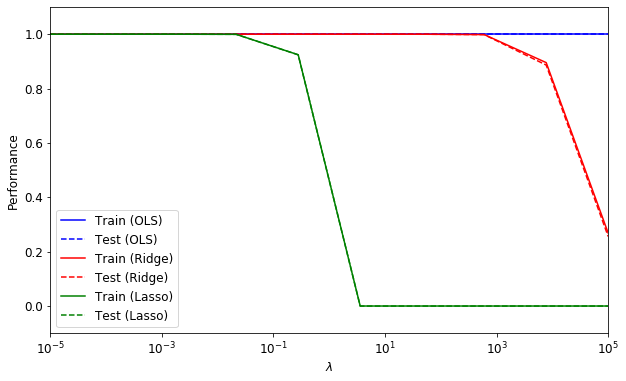

In [8]:
plt.semilogx(alphas,train_errors_ols,'b',label='Train (OLS)')
plt.semilogx(alphas,test_errors_ols,'--b',label='Test (OLS)')

plt.semilogx(alphas,train_errors_ridge,'r',label='Train (Ridge)')
plt.semilogx(alphas,test_errors_ridge,'--r',label='Test (Ridge)')

plt.semilogx(alphas,train_errors_lasso,'g',label='Train (Lasso)')
plt.semilogx(alphas,test_errors_lasso,'--g',label='Test (Lasso)')

fig = plt.gcf()
fig.set_size_inches(10.0,6.0)

plt.legend(loc='best',fontsize=12)
plt.ylim([-0.1,1.1])
plt.xlim([min(alphas),max(alphas)])
plt.xlabel(r'$\lambda$',fontsize=12)
plt.ylabel('Performance',fontsize=12)
plt.tick_params(labelsize=12)
plt.show()
